In [1]:
!pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.



     -------------------------------------- 272.8/272.8 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 5.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 3.6 MB/s eta 0:00:00
     ------------------------------

In [1]:
import tensorflow as tf
import numpy as np

## Create one hot encoding with keras.layers.StringLookup
### StringLookup if categories are known, then no need to adapt layer to data, it maps oov word to 0

In [34]:
categories = tf.constant(['category_a', 'category_b', 'category_c'], dtype=tf.string)

onehot_stringLookup = tf.keras.layers.StringLookup(vocabulary=categories, 
                                                   output_mode='one_hot', 
                                                   sparse=False) # set True for sparse list

onehot_stringLookup(tf.constant(['category_c', 'category_a', 'category_b', 'category_x', 'abc', 'x']))

<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

### StringLookup with adapt, but adapt still requires categories

In [45]:
# categories appearing in a single feature column in training data
categories_in_training_column = tf.constant(['category_a', 'category_b', 'category_c'])

# categories appearing in a single feature column in test data
example_test_data = tf.constant(['category_c', 'category_a', 'category_b', 
                                 'category_x', 'abc', 'x', 'category_a'])

onehot_stringLookup = tf.keras.layers.StringLookup(output_mode='one_hot', 
                                                   sparse=False) # set True for sparse list

# adapt layer on training categories in a single column
onehot_stringLookup.adapt(categories_in_training_column)

categorical_rows_one_column = onehot_stringLookup(example_test_data)
categorical_rows_one_column

<tf.Tensor: shape=(7, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

## Joining tensors

In [49]:
first = tf.constant([4., 5.])
second = tf.constant([0., 1., 0., 0.])
joined = tf.concat([first, second], axis=0)
joined

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([4., 5., 0., 1., 0., 0.], dtype=float32)>

In [31]:
x = tf.range(15, dtype=tf.float32)
print("x as a 1d tensor:", x)

x = tf.expand_dims(input=x, axis=0)
print("x as a 2d tensor:", x, "\n")

x = tf.reshape(tensor=x, shape=(3, -1))
print("x reshaped:\n", x, "\n")

print(" std across row:", tf.math.reduce_std(x, axis=-1))
print("mean across row:", tf.math.reduce_mean(x, axis=-1))

x as a 1d tensor: tf.Tensor([ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.], shape=(15,), dtype=float32)
x as a 2d tensor: tf.Tensor([[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]], shape=(1, 15), dtype=float32) 

x reshaped:
 tf.Tensor(
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]], shape=(3, 5), dtype=float32) 

 std across row: tf.Tensor([1.4142135 1.4142135 1.4142135], shape=(3,), dtype=float32)
mean across row: tf.Tensor([ 2.  7. 12.], shape=(3,), dtype=float32)


## Normalize across row with Tensorflow Normalization layer

In [33]:
norm_layer = tf.keras.layers.Normalization(axis=0)
norm_layer.adapt(data=x, batch_size=3)
print(norm_layer(x))
norm_layer.weights

tf.Tensor(
[[-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]
 [-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]
 [-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]], shape=(3, 5), dtype=float32)


[<tf.Variable 'mean:0' shape=(3,) dtype=float32, numpy=array([ 2.,  7., 12.], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(3,) dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=5>]

## Normalize across column with Tensorflow Normalization layer

In [38]:
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(data=x)
print(norm_layer(x))
norm_layer.weights

tf.Tensor(
[[-1.2247449 -1.2247449 -1.2247449 -1.2247449 -1.2247449]
 [ 0.         0.         0.         0.         0.       ]
 [ 1.2247449  1.2247449  1.2247449  1.2247449  1.2247449]], shape=(3, 5), dtype=float32)


[<tf.Variable 'mean:0' shape=(5,) dtype=float32, numpy=array([5., 6., 7., 8., 9.], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(5,) dtype=float32, numpy=
 array([16.666666, 16.666666, 16.666666, 16.666666, 16.666666],
       dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=3>]

In [39]:
x_cat = tf.constant(['nyc', 'sf', 'la'])
x_cat

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'nyc', b'sf', b'la'], dtype=object)>

## Turn categories into integers

In [53]:
string_lookup_layer = tf.keras.layers.StringLookup()
string_lookup_layer.adapt(x_cat)
print("vocabulary:", string_lookup_layer.get_vocabulary())
cat_to_int = string_lookup_layer(x_cat)
cat_to_int

vocabulary: ['[UNK]', 'sf', 'nyc', 'la']


<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 1, 3], dtype=int64)>

## One hot encoding with CategoryEncoding layer after StringLookup layer or IntegerLookup layer

In [56]:
category_encoding_layer = tf.keras.layers.CategoryEncoding(num_tokens=string_lookup_layer.vocabulary_size(),
                                                           output_mode="one_hot")
category_encoding_layer(cat_to_int)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

## Convert data to TFRecord
##### step 1: serialize data into byte-strings, one way to is to use tf.train.Example
##### step 2: turn serialized data into TFRecord format with tf.data.TFRecordWriter

#### if data is already in byte-string format:
##### use tf.data.TFRecordwriter to write byte-string data into TFRecord format
##### to convert it back, use tf.data.TFRecordsDataset

#### https://www.tensorflow.org/tutorials/load_data/tfrecord

In [ ]:
path = r"C:\Users\Arslan\desktop\python-notebooks" # or
path = "C:\\Users\\Arslan\\desktop\\python-notebooks" # or
path = "C:/Users/Arslan/desktop/python-notebooks"

path = path + "/example_data.tfrecord"

tf_data = tf.data.Dataset.from_tensor_slices([b'123', b'abc'])


tf_writer = tf.io.TFRecordWriter(path)
tf_writer.write(tf_data)

tf_data_2 = tf.data.TFRecordDataset(path)

for example in tf_data_2:
    print(example)

In [29]:
tf_data = tf.data.Dataset.from_tensor_slices([b'123', b'abc'])

for data in tf_data:
    print(type(data))
    print(data)
    print('----')

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'123', shape=(), dtype=string)
----
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'abc', shape=(), dtype=string)
----


In [68]:
# image = tf.constant([
#     [1,2,3],
#     [4,5,6],
#     [7,8,9]
# ])
image = tf.random.uniform(shape=(3,3))
label = 0
class_name = "class A"
other_info = 0.4

# wrap "feature" as either BytesList, FloatList or Int64List
image_feature = tf.train.Feature(
    bytes_list=tf.train.BytesList(value=[tf.io.serialize_tensor(image).numpy()])
)

label_feature = tf.train.Feature(
    int64_list=tf.train.Int64List(value=[label])
)

class_name_feature = tf.train.Feature(
    bytes_list=tf.train.BytesList(value=[class_name.encode()])
)

other_info_feature = tf.train.Feature(
    float_list=tf.train.FloatList(value=[other_info])
)

all_features = tf.train.Features(feature={
    'image': image_feature,
    'label': label_feature,
    'class_name': class_name_feature,
    'other_info': other_info_feature
})

tf_example = tf.train.Example(features=all_features)
print('type:', type(tf_example))
print('class name:', tf_example.features.feature['class_name'])
tf_example

type: <class 'tensorflow.core.example.example_pb2.Example'>
class name: bytes_list {
  value: "class A"
}



features {
  feature {
    key: "other_info"
    value {
      float_list {
        value: 0.4
      }
    }
  }
  feature {
    key: "label"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\001\022\010\022\002\010\003\022\002\010\003\"$6Gu?\004\350w?\214U-?\310\211\255>0\321\207>\020?\330=\024\217\275>\016\263\035?\032O[?"
      }
    }
  }
  feature {
    key: "class_name"
    value {
      bytes_list {
        value: "class A"
      }
    }
  }
}

In [69]:
# size increases as data size increases 
# but now the serialized data can be written to tfrecord format
serialized_tf_example = tf_example.SerializeToString()
serialized_tf_example

b'\n\x84\x01\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x00\n\x19\n\nclass_name\x12\x0b\n\t\n\x07class A\n?\n\x05image\x126\n4\n2\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x03"$6Gu?\x04\xe8w?\x8cU-?\xc8\x89\xad>0\xd1\x87>\x10?\xd8=\x14\x8f\xbd>\x0e\xb3\x1d?\x1aO[?\n\x16\n\nother_info\x12\x08\x12\x06\n\x04\xcd\xcc\xcc>'

In [70]:
import sys

print('size of tf_example in bytes:', sys.getsizeof(tf_example))
print('size of serialized_tf_example in bytes:', sys.getsizeof(serialized_tf_example))

size of tf_example in bytes: 80
size of serialized_tf_example in bytes: 168


## Bigger dataset with tf.train.Example

In [74]:
# dummy dataset

# The number of observations in the dataset.
n_observations = int(1e4)

# Boolean feature, encoded as False or True.
feature0 = np.random.choice([False, True], n_observations)

# Integer feature, random from 0 to 4.
feature1 = np.random.randint(0, 5, n_observations)

# String feature.
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

# Float feature, from a standard normal distribution.
feature3 = np.random.randn(n_observations)

In [76]:
# functions for converting to tf.train.Feaure

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [83]:
# pass the data through tf.train.Feature functions defined above

def serialize_example(feature0, feature1, feature2, feature3):
    """
    Creates a tf.train.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.train.Example-compatible
    # data type.
    feature_dict = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }

    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature_dict))

    # Serialize the tf.train.Example message
    return example_proto.SerializeToString()

In [79]:
example_observation_serialized = serialize_example(False, 4, b'goat', 0.9876)
example_observation_serialized

b'\nR\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04'

In [81]:
# to deserialize
example_proto = tf.train.Example.FromString(example_observation_serialized)
example_proto

features {
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
}

In [2]:
import tensorflow_data_validation

ModuleNotFoundError: No module named 'tensorflow_data_validation'

## Reshaping tensor and viewing Flatten layer

In [99]:
import tensorflow as tf
import timeit

In [105]:
tensor_1d = tf.range(start=1, limit=49)
reshaped_tensor_1d = tf.reshape(tensor_1d, shape=(4, 4, 3))
reshaped_tensor_1d

<tf.Tensor: shape=(4, 4, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18],
        [19, 20, 21],
        [22, 23, 24]],

       [[25, 26, 27],
        [28, 29, 30],
        [31, 32, 33],
        [34, 35, 36]],

       [[37, 38, 39],
        [40, 41, 42],
        [43, 44, 45],
        [46, 47, 48]]])>

In [106]:
flatten_layer = tf.keras.layers.Flatten()
flatten_layer(reshaped_tensor_1d)

<tf.Tensor: shape=(4, 12), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]])>

In [115]:
flatten_layer1 = tf.keras.layers.Flatten(input_shape=(4, 4, 3))
flatten_layer1(reshaped_tensor_1d)

<tf.Tensor: shape=(4, 12), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]])>

In [120]:
flatten_layer2 = tf.keras.layers.Flatten(input_shape=(4, 12))
flatten_layer2(flatten_layer1(reshaped_tensor_1d))

<tf.Tensor: shape=(4, 12), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]])>

## One hot encoding integers with IntegerLookup layer

In [81]:
x_int_cat = tf.random.uniform(shape=(4, 1), minval=1, maxval=100, dtype=tf.int32, seed=0)
x_int_cat

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[19],
       [82],
       [83],
       [38]])>

In [82]:
integer_lookup_layer = tf.keras.layers.IntegerLookup(output_mode='one_hot', sparse=True)
integer_lookup_layer.adapt(x_int_cat)
print("integers:", integer_lookup_layer.get_vocabulary())
cat_to_int = integer_lookup_layer(x_int_cat)
cat_to_int

integers: [-1, 83, 82, 38, 19]


SparseTensor(indices=tf.Tensor(
[[0 4]
 [1 2]
 [2 1]
 [3 3]], shape=(4, 2), dtype=int64), values=tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32), dense_shape=tf.Tensor([4 5], shape=(2,), dtype=int64))

In [83]:
integer_lookup_layer = tf.keras.layers.IntegerLookup(output_mode='one_hot', sparse=False)
integer_lookup_layer.adapt(x_int_cat)
print("integers:", integer_lookup_layer.get_vocabulary())
cat_to_int = integer_lookup_layer(x_int_cat)
cat_to_int

integers: [-1, 83, 82, 38, 19]


<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [95]:
xx_int_cat = tf.random.uniform(shape=(1000000, 1), minval=0, maxval=10000000, dtype=tf.int32, seed=0)
yy = tf.ones(shape=(32, 1))

In [96]:
sparse_integer_lookup_layer = tf.keras.layers.IntegerLookup(output_mode="one_hot", sparse=True)
sparse_integer_lookup_layer.adapt(xx_int_cat)

In [ ]:
%%timeit

sparse_model = tf.keras.Sequential([
    tf.keras.Input(shape=1, sparse=True),
    sparse_integer_lookup_layer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

sparse_model.predict(xx_int_cat)

In [ ]:
nonsparse_integer_lookup_layer = tf.keras.layers.IntegerLookup(output_mode="one_hot", sparse=False)
nonsparse_integer_lookup_layer.adapt(xx_int_cat)

In [ ]:
%%timeit

nonsparse_model = tf.keras.Sequential([
    tf.keras.Input(shape=1),
    nonsparse_integer_lookup_layer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

nonsparse_model.predict(xx_int_cat)

In [126]:
import time

start_time = time.time()

print("Time to run:", time.time() - start_time)

Time to run: 0.0


In [138]:
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

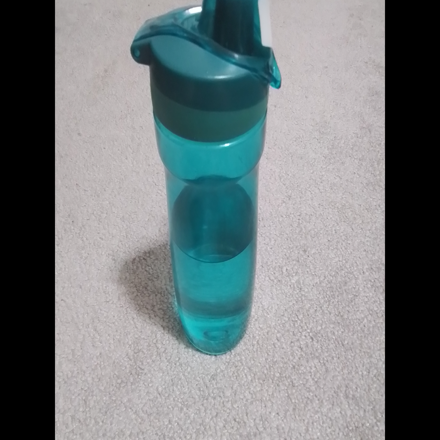

In [137]:
bottle = Image.open("C:\\Users\\Arslan\\Desktop\\water-bottle.jpg")
bottle.rotate(270).resize((440, 440))

Found 2 files belonging to 2 classes.


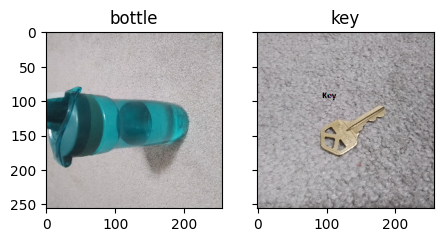

In [206]:
PATH = "C:\\Users\\Arslan\\Desktop\\example-images"
image_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                            image_size=(256,256), interpolation="mitchellcubic",
                                                            crop_to_aspect_ratio=True,
                                                            seed=0, shuffle=False, batch_size=2)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(5,5))

for image, labels in image_dataset.take(1):
    for i in range(image.shape[0]):
        ax[i].imshow(image[i].numpy().astype("uint8"))
        ax[i].set_title(image_dataset.class_names[labels[i]])
plt.show()

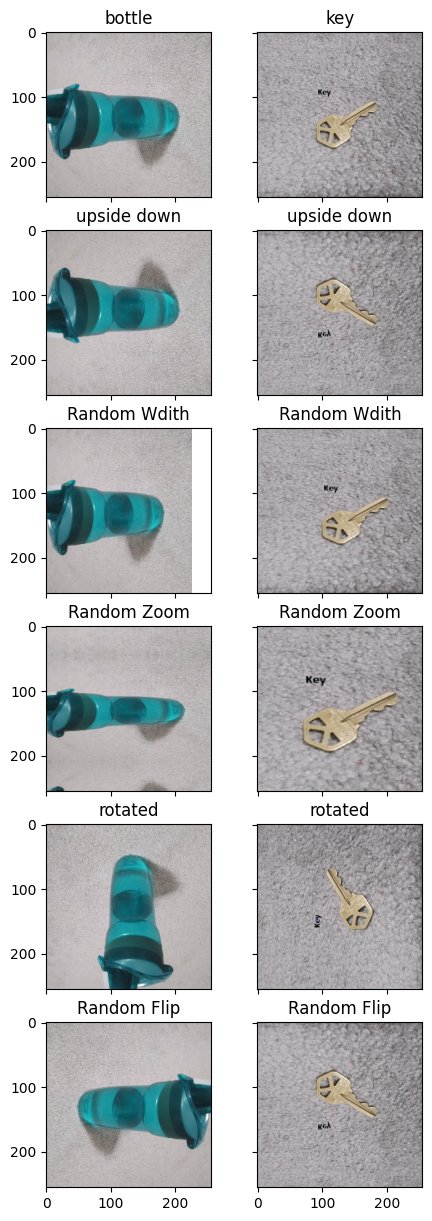

In [190]:
# resize = tf.keras.layers.Resizing(440, 440)
random_width_layer = tf.keras.layers.RandomWidth(0.3)
random_zoom_layer = tf.keras.layers.RandomZoom(height_factor=-0.9, width_factor=-0.5)
random_flip_layer = tf.keras.layers.RandomFlip()

fig, ax = plt.subplots(nrows=6, ncols=2, sharex=True, sharey=True, figsize=(5,15))

for image, labels in image_dataset.take(1):
    for i in range(image.shape[0]):
        # original
        ax[0][i].imshow(image[i].numpy().astype("uint8"))
        ax[0][i].set_title(image_dataset.class_names[labels[i]])
        # up side down
        ax[1][i].imshow(tf.image.flip_up_down(image[i]).numpy().astype("uint8"))
        ax[1][i].set_title("upside down")
        # random width
        ax[2][i].imshow(random_width_layer(image[i]).numpy().astype("uint8"))
        ax[2][i].set_title("Random Wdith")
        # random zoom
        ax[3][i].imshow(random_zoom_layer(image[i]).numpy().astype("uint8"))
        ax[3][i].set_title("Random Zoom")
        # rotate
        ax[4][i].imshow(tf.image.rot90(image[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotated")
        # random flip
        ax[5][i].imshow(random_flip_layer(image[i]).numpy().astype("uint8"))
        ax[5][i].set_title("Random Flip")
plt.show()

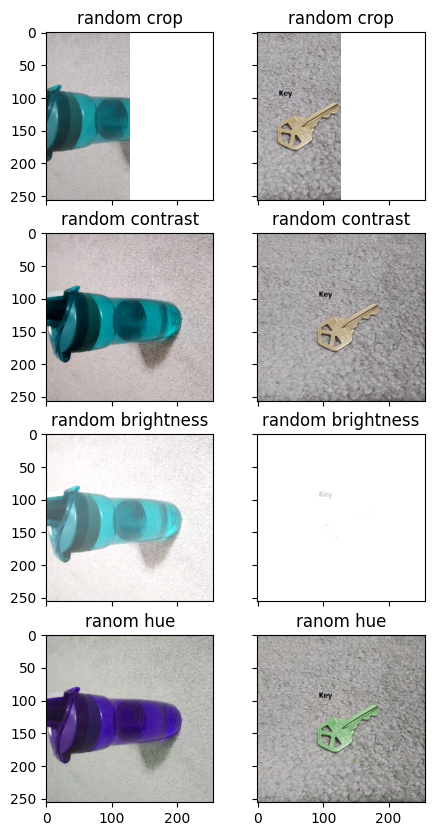

In [202]:
# resize = tf.keras.layers.Resizing(440, 440)
random_crop_layer = tf.keras.layers.RandomCrop(height=256, width=128)
random_contrast_layer = tf.keras.layers.RandomContrast(0.3)
random_brightness_layer = tf.keras.layers.RandomBrightness([-0.8, 0.8])

fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(5,10))

for image, labels in image_dataset.take(1):
    for i in range(image.shape[0]):
        # original
        ax[0][i].imshow(random_crop_layer(image[i]).numpy().astype("uint8"))
        ax[0][i].set_title("random crop")

        ax[1][i].imshow(random_contrast_layer(image[i]).numpy().astype("uint8"))
        ax[1][i].set_title("random contrast")
        # random zoom
        ax[2][i].imshow(random_brightness_layer(image[i]).numpy().astype("uint8"))
        ax[2][i].set_title("random brightness")
        # rotate
        ax[3][i].imshow(tf.image.stateless_random_hue(image[i], max_delta=0.3, seed=(1,2)).numpy().astype("uint8"))
        ax[3][i].set_title("ranom hue")

plt.show()

In [238]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(image_one, image_two, alpha=0.2):
    batch_size = 2
    
    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    image = image_one * x_l + image_two * (1 - x_l)
    return image

(2, 256, 256, 3)
(2, 256, 256, 3)


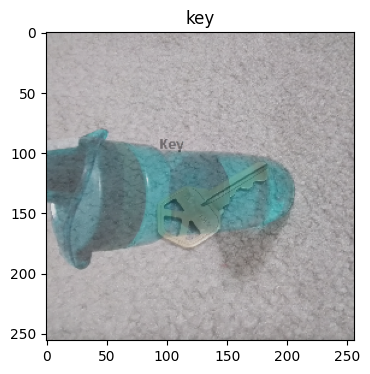

In [242]:
fig, ax = plt.subplots(figsize=(4,4))

for image, label in image_dataset.take(1):
    print(image.numpy().shape)
    image_one = image[0].numpy()
    image_two = image[1].numpy()
    mixed_up_image = mix_up(image_one, image_two)
    print(mixed_up_image.shape)
    ax.imshow(mixed_up_image[i].numpy().astype("uint8"))
    ax.set_title(image_dataset.class_names[label[i]])
plt.show()

(2, 256, 256, 3)


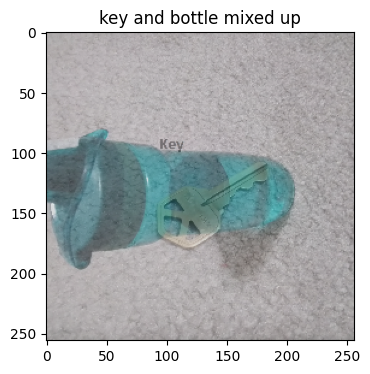

In [258]:
fig, ax = plt.subplots(figsize=(4,4))

for image, label in image_dataset.take(1):
    image_one = image[0].numpy()
    image_two = image[1].numpy()
    mixed_up_image = mix_up(image_one, image_two)
    print(mixed_up_image.shape)
    ax.imshow(mixed_up_image[i].numpy().astype("uint8"))
    ax.set_title("key and bottle mixed up")
plt.show()